In [1]:
# import the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load the dataset
data = pd.read_csv('dataframe_innomatics.csv')

In [6]:
data.dropna(inplace=True)
data

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1691,25.410184,-76.380902
1692,29.537304,-82.796934
1693,31.633331,-87.000000
1694,29.091458,-104.943052


In [5]:
data.isnull().sum()

input     0
output    0
dtype: int64

In [7]:
data.round(2)

,input,output
0,-122.74,-130.57
1,-121.53,-129.94
2,-134.92,-130.14
3,-120.61,-125.76
4,-129.89,-112.79
...,...,...
1691,25.41,-76.38
1692,29.54,-82.80
1693,31.63,-87.00
1694,29.09,-104.94


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='input'>

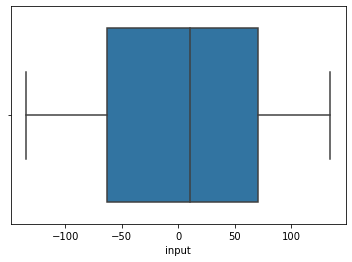

In [31]:
# Box Plot
import seaborn as sns
sns.boxplot(data['input'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='output'>

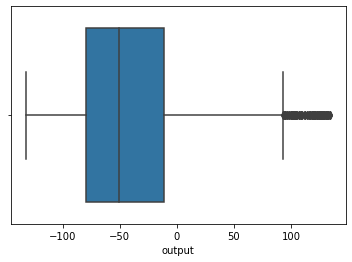

In [32]:
sns.boxplot(data['output'])

In [33]:
# Position of the Outlier
print(np.where(data['output']>90))

(array([ 335,  339,  341,  342,  343,  345,  346,  347,  348,  350,  351,
        352,  353,  354,  355,  356,  357,  358,  359,  360,  361,  362,
        363,  453,  456,  457,  460,  461,  462,  463,  464,  465,  466,
        467,  468,  470,  471,  472,  473,  474,  475,  476,  477,  478,
        479,  480,  481,  482,  483,  484,  485,  486,  487,  488,  489,
        490,  491,  492,  493,  494,  495,  496,  498, 1038, 1043, 1044,
       1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056,
       1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067,
       1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078,
       1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089,
       1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100,
       1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1445,
       1449, 1451, 1452, 1453, 1455, 1456, 1457, 1458, 1460, 1461, 1462,
       1463, 1464, 1465, 1466, 1467, 1468, 1469, 1

In [40]:
# Detection
# IQR
Q1 = np.percentile(data['output'], 25, interpolation = 'midpoint')
Q3 = np.percentile(data['output'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", data.shape)

Old Shape:  (1696, 2)


In [41]:
# Upper bound
upper = np.where(data['output'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data['output'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
 
print("New Shape: ", data.shape)

New Shape:  (1552, 2)


<AxesSubplot:xlabel='input', ylabel='output'>

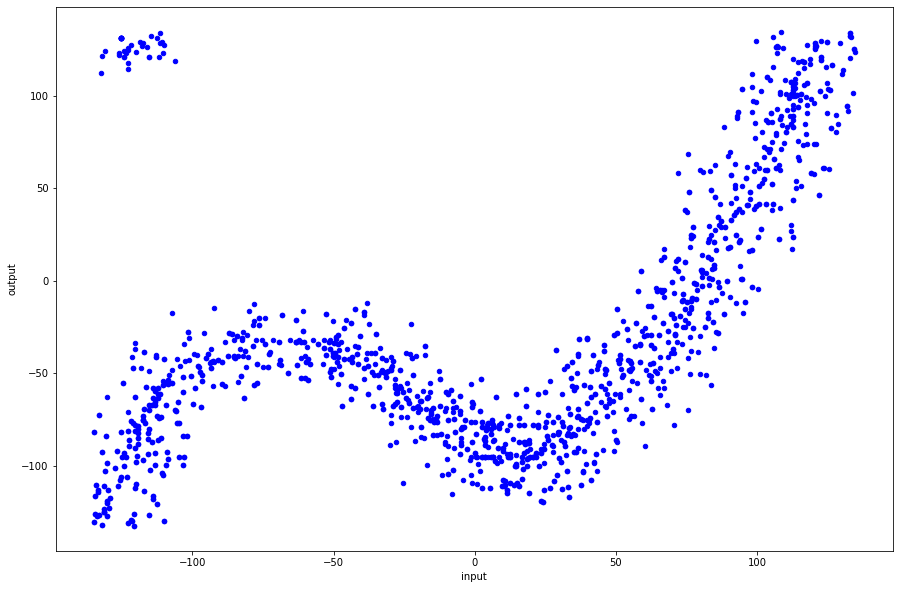

In [39]:
# Scatter plot
data.plot.scatter(x = 'input', y = 'output', color='blue', figsize = (15,10))

<AxesSubplot:xlabel='input', ylabel='output'>

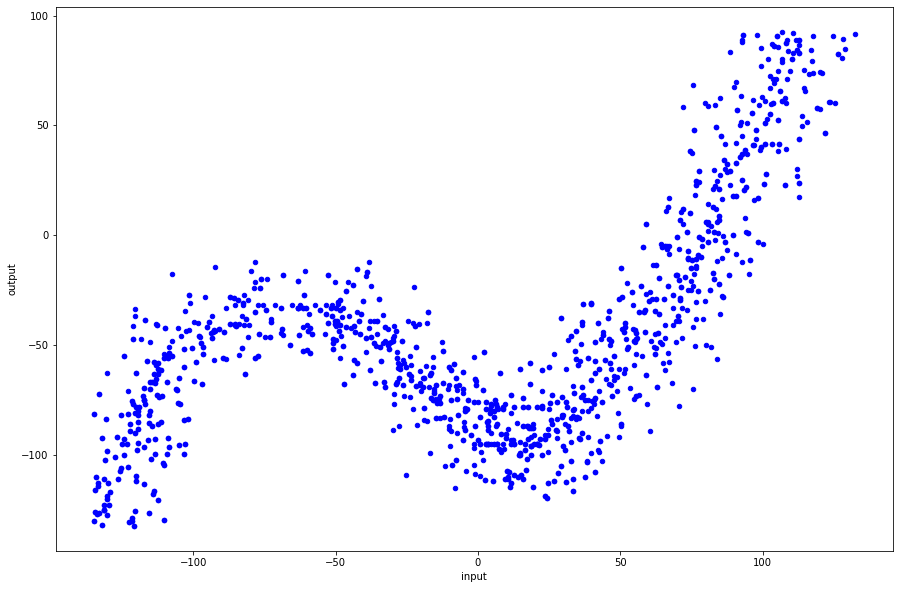

In [43]:
data.plot.scatter(x = 'input', y = 'output', color='blue', figsize = (15,10))

In [44]:
y = data['input'].values.reshape(-1, 1)
X = data['output'].values.reshape(-1, 1)

In [45]:
#Training a Linear Regression Model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1241, 1)
(1241, 1)
(311, 1)
(311, 1)


In [46]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [47]:
np.any(np.isnan(data))
np.all(np.isfinite(data))

True

In [48]:
regressor.fit(X_train, y_train)

LinearRegression()

In [51]:
# Plotting the regression line
line = regressor.coef_* X + regressor.intercept_ #Y= M*X + C

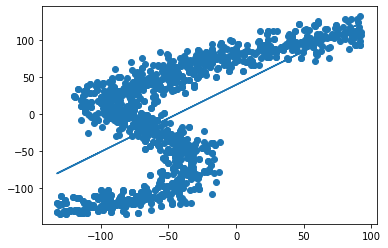

In [56]:
#Plotting the test data
plt.scatter(X, y) 
plt.plot(X, line)
plt.show()

In [18]:
print(data.corr())

           input    output
input   1.000000  0.511776
output  0.511776  1.000000


In [57]:
print(regressor.intercept_)

[39.59306732]


In [58]:
print(regressor.coef_)

[[0.90565985]]


In [63]:
Output = regressor.predict([[82]])
print(Output)

[[113.85717518]]


In [66]:
# Instead of typing the value directly, we can ask for Study hours

Output_ans = float(input('Please enter the input value '))
Output = regressor.predict([[Output_ans]])
print('Input {} values, you have a high chance of gettting a {} Output.'.format(Output_ans, Output)) 

Please enter the input value 68
Input 68.0 values, you have a high chance of gettting a [[101.17793725]] Output.


In [68]:
y_pred = regressor.predict(X_test)

In [69]:
data_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(data_preds)

         Actual   Predicted
0    -58.914585   -9.054406
1     71.160987   18.164362
2     74.633331   20.574210
3    117.596660  106.559601
4    -12.307174  -21.363506
..          ...         ...
306  -87.268975    2.963409
307    6.633331  -31.048401
308  -31.366669   -7.501245
309  -87.024104   13.953519
310 -121.650403  -28.839803

[311 rows x 2 columns]


In [70]:
predictions = regressor.predict(X_test)
predictions

array([[-9.05440567e+00],
       [ 1.81643617e+01],
       [ 2.05742104e+01],
       [ 1.06559601e+02],
       [-2.13635065e+01],
       [-6.59558513e+00],
       [-2.22189613e+00],
       [ 7.28130206e+00],
       [-3.90309261e+01],
       [-6.11172201e-01],
       [ 2.36389855e+00],
       [ 8.87155975e+00],
       [-1.56871850e+01],
       [-1.31147782e+01],
       [ 6.18311375e+01],
       [-1.29375642e+01],
       [ 1.79206463e+01],
       [-4.78426543e+00],
       [-2.75782649e+01],
       [ 8.40863037e+01],
       [-7.50124498e+00],
       [-4.64446186e+01],
       [ 6.41112381e+00],
       [-4.67881468e+01],
       [ 1.12509892e+02],
       [-1.58042168e+01],
       [-4.97479276e+01],
       [ 3.86874075e+01],
       [-2.22193477e+01],
       [ 1.31523230e+01],
       [-3.74701738e+01],
       [-4.59192050e+01],
       [ 2.60081695e+01],
       [-1.28929071e+01],
       [ 1.51402513e+01],
       [-5.61452716e+01],
       [-4.59502410e+00],
       [ 6.48611238e+01],
       [-4.8

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

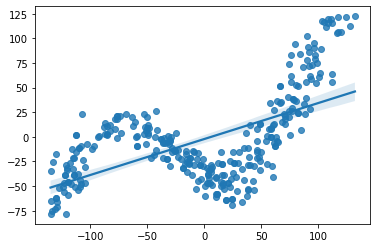

In [71]:
# Plot it
sns.regplot(y_test,predictions)

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [73]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [74]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 51.42
Mean squared error: 3489.14
Root mean squared error: 59.07
